# Wiggly curves + Prediction + Bias-variance tradeoff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

/Users/davidpuelz/anaconda3/envs/IntroMLenv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Read in the ERCOT power demand data

In [2]:
data = pd.read_csv('../data/ERCOT_data.csv')

Scatter plot power demand and temperature!

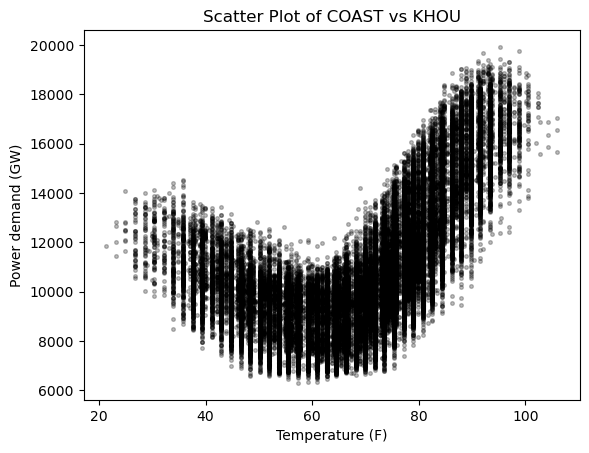

In [3]:
x_data = data['KHOU']
y_data = data['COAST']
plt.scatter(x_data,y_data,s=7,alpha=0.25,c="black")
plt.xlabel('Temperature (F)')
plt.ylabel('Power demand (GW)')
plt.title('Scatter Plot of COAST vs KHOU')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of COAST vs KHOU')

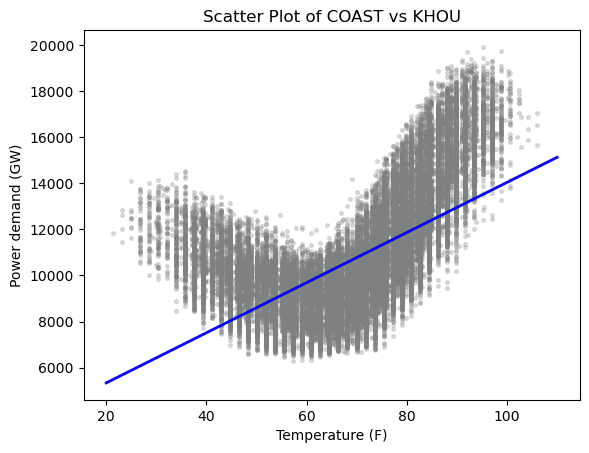

In [4]:
# Fit a polynomial of degree 1
slope, intercept  = np.polyfit(x_data, y_data, 1)
x = np.linspace(20,110,500)
line = slope * x + intercept 

# Plot original scatterplot
plt.scatter(x_data,y_data,s=7,alpha=0.25,c="gray")

# Plot best first-order fit
plt.plot(x, line,label = '1st order',color="blue",lw=2)
plt.xlabel('Temperature (F)')
plt.ylabel('Power demand (GW)')
plt.title('Scatter Plot of COAST vs KHOU')

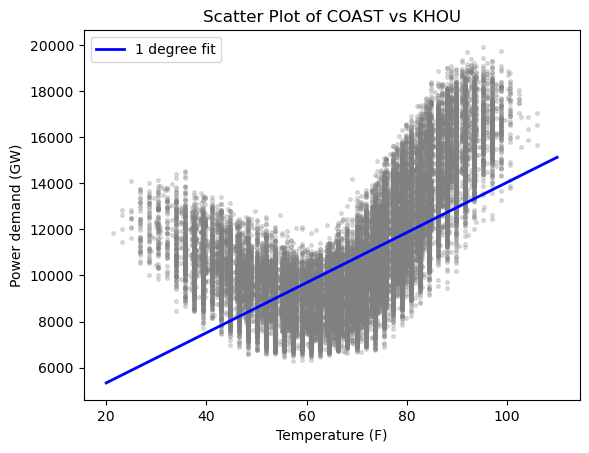

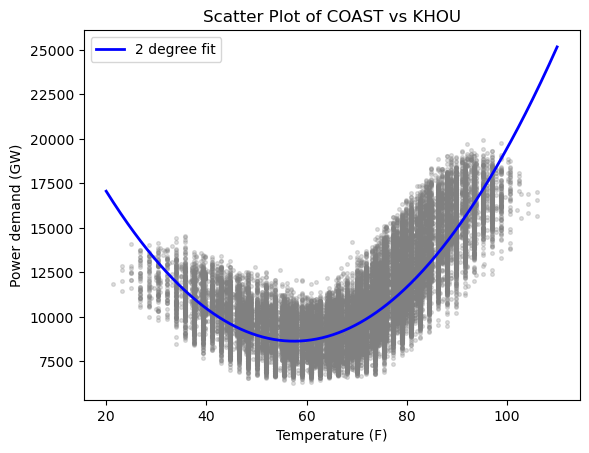

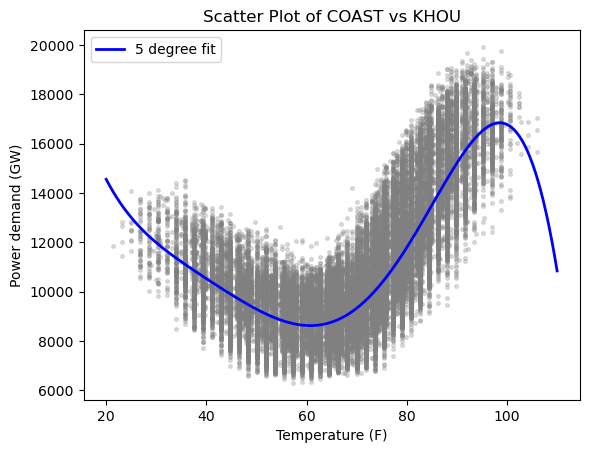

In [5]:
def plot_polyfit(x_data, y_data, degree):
    
    # Fit a polynomial of the specified degree
    coeffs = np.polyfit(x_data, y_data, degree)
    poly_func = np.poly1d(coeffs)  # Create a polynomial function from the coefficients
    
    # Generate points for plotting the polynomial fit
    x = np.linspace(20,110,500)
    
    # Generate y values for the fitted line
    y_fit = poly_func(x)
    
    # Plot original scatterplot
    plt.scatter(x_data, y_data, s=7, alpha=0.25, c="gray")
    
    # Plot the polynomial fit line
    plt.plot(x, y_fit, label=f'{degree} degree fit', color="blue", lw=2)
    plt.xlabel("x_data")
    plt.ylabel("y_data")
    plt.title(f"Polynomial Fit of Degree {degree}")
    plt.xlabel('Temperature (F)')
    plt.ylabel('Power demand (GW)')
    plt.title('Scatter Plot of COAST vs KHOU')
    plt.legend()
    plt.show()

# Example usage with different degrees
plot_polyfit(x_data, y_data, 1)  # Linear fit
plot_polyfit(x_data, y_data, 2)  # Quadratic fit
plot_polyfit(x_data, y_data, 5)  # Cubic fit

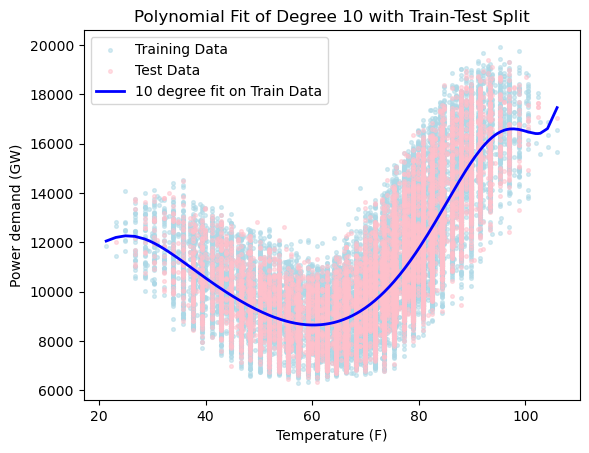

In [6]:
# Define the train-test split ratio
test_ratio = 0.2
n_test = int(len(x_data) * test_ratio)

# Shuffle the indices and split
indices = np.random.permutation(len(x_data))
train_indices = indices[n_test:]
test_indices = indices[:n_test]

# Split the data
x_train, y_train = x_data[train_indices], y_data[train_indices]
x_test, y_test = x_data[test_indices], y_data[test_indices]

# Fit a polynomial of the desired degree on the training data
degree = 10  # Adjust degree as desired
coeffs = np.polyfit(x_train, y_train, degree)
poly_func = np.poly1d(coeffs)  # Create a polynomial function from the coefficients

# Predict on test data
y_train_pred = poly_func(x_train)
y_test_pred = poly_func(x_test)

# Plot training data, test data, and polynomial fit
plt.scatter(x_train, y_train, color="lightblue", s=7, alpha=0.5,label="Training Data")
plt.scatter(x_test, y_test, color="pink",s=7, alpha=0.5, label="Test Data")
plt.plot(np.sort(x_train), poly_func(np.sort(x_train)),color="blue", label=f'{degree} degree fit on Train Data', lw=2)

plt.xlabel('Temperature (F)')
plt.ylabel('Power demand (GW)')
plt.title(f"Polynomial Fit of Degree {degree} with Train-Test Split")
plt.legend()
plt.show()

In [7]:
def root_mean_squared_error(y_true, y_pred):
    # Calculate the squared differences
    squared_errors = (y_true - y_pred) ** 2
    
    # Calculate and return the mean of squared differences
    return np.sqrt(np.mean(squared_errors))

In [8]:
# Fit a polynomial of the desired degree on the training data
degree = 8  # Adjust degree as desired
coeffs = np.polyfit(x_train, y_train, degree)
poly_func = np.poly1d(coeffs)  # Create a polynomial function from the coefficients

# Predict on test data
y_train_pred = poly_func(x_train)
y_test_pred = poly_func(x_test)
# Calculate MSE on test data
test_mse = root_mean_squared_error(y_test, y_test_pred)
print("Root Mean Squared Error on Test Data:", test_mse)

Root Mean Squared Error on Test Data: 1389.2254273089109


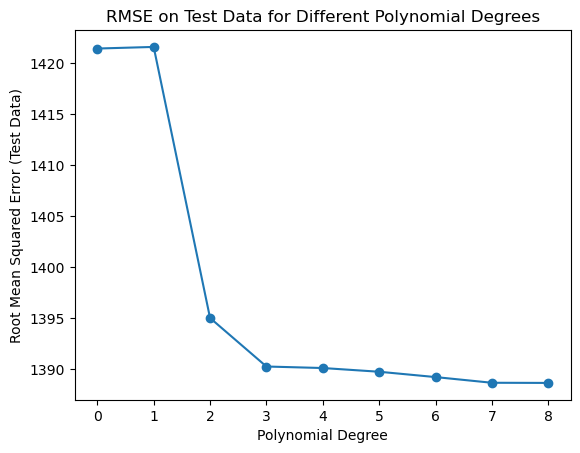

In [9]:
# Initialize lists to store degrees and corresponding test MSE values
degrees = range(9)
test_mse_list = []

# Loop over polynomial degrees from 0 through 10
for degree in degrees:
    # Fit a polynomial of the current degree on the training data
    coeffs = np.polyfit(x_train, y_train, degree+2)
    poly_func = np.poly1d(coeffs)
    
    # Predict on test data
    y_test_pred = poly_func(x_test)
    
    # Calculate Mean Squared Error on test data and store it
    test_mse = root_mean_squared_error(y_test, y_test_pred)
    test_mse_list.append(test_mse)

# Plot MSE vs. Degree
plt.plot(degrees, test_mse_list, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error (Test Data)")
plt.title("RMSE on Test Data for Different Polynomial Degrees")
plt.show()

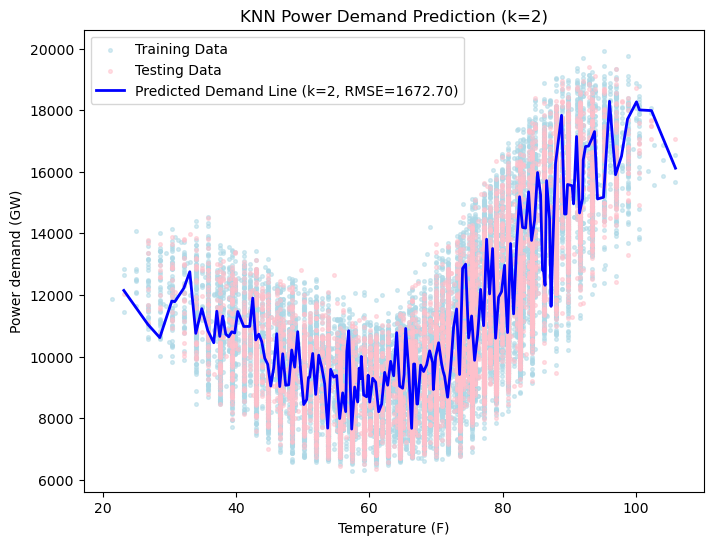

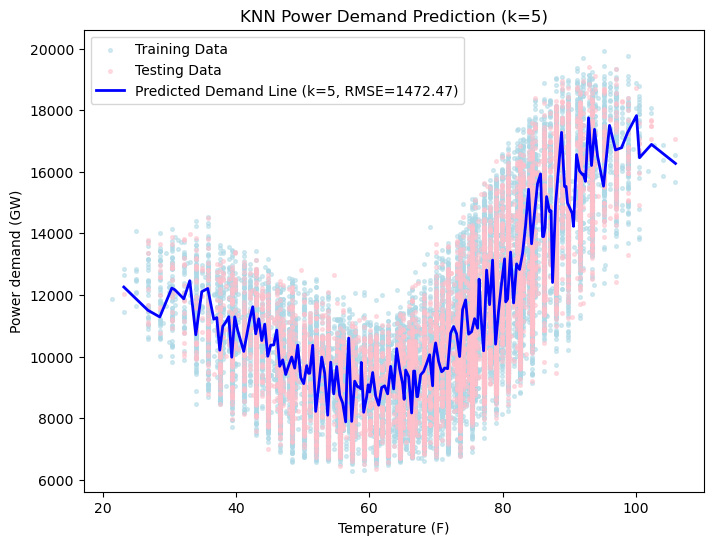

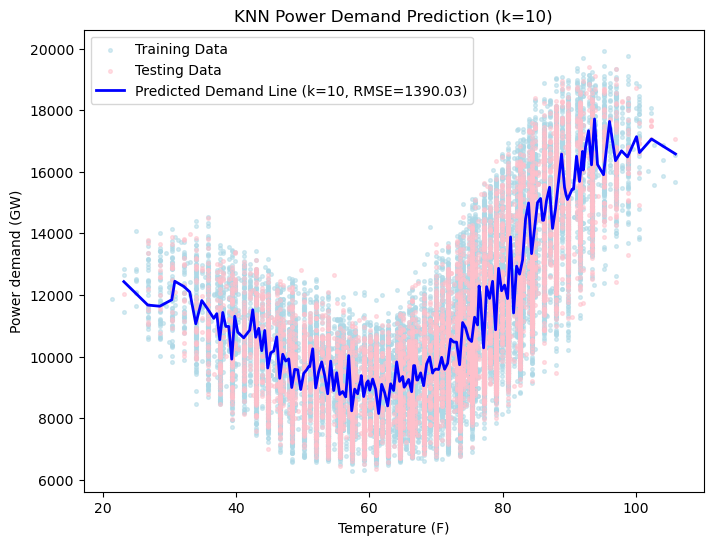

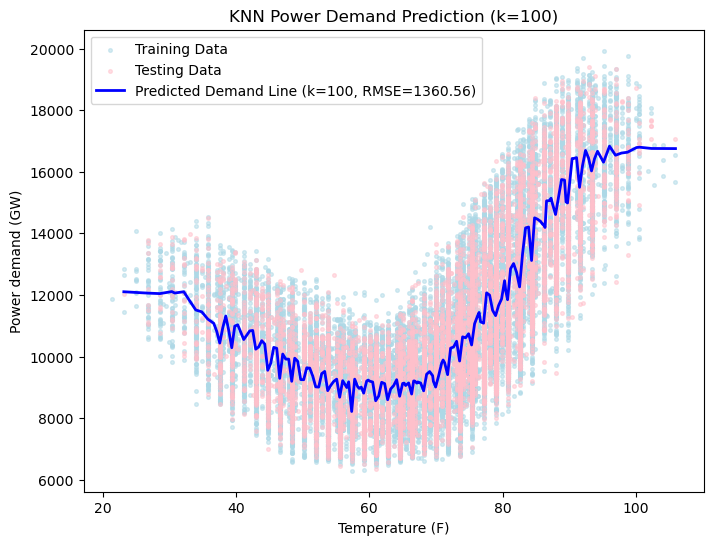

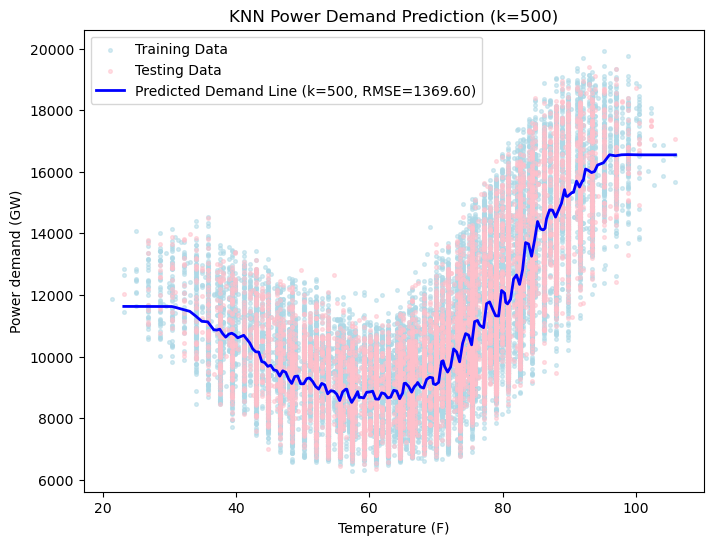

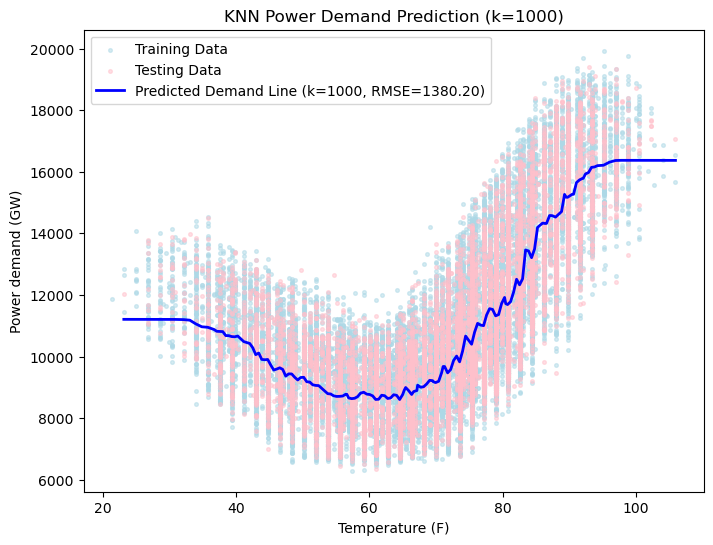

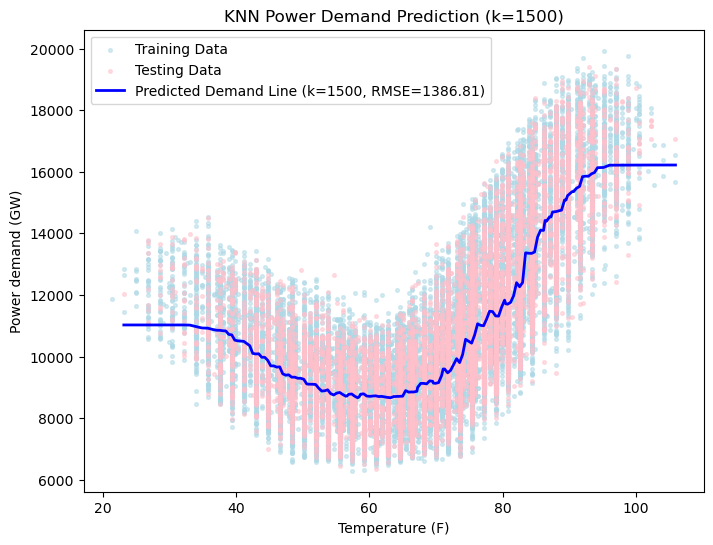

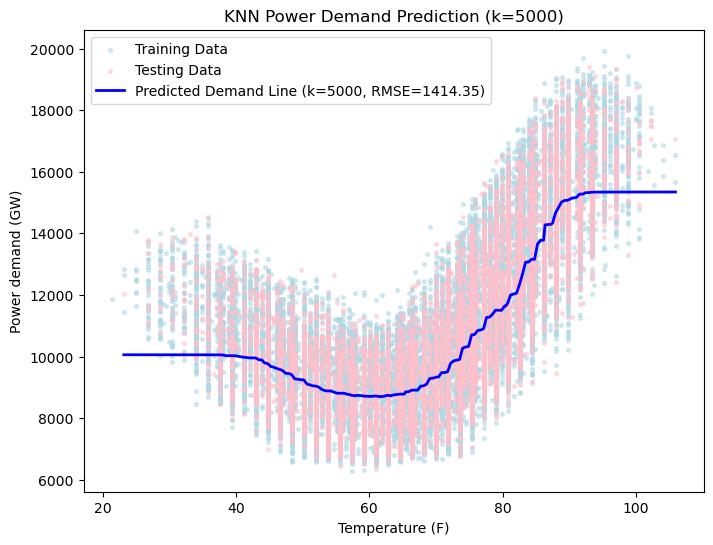

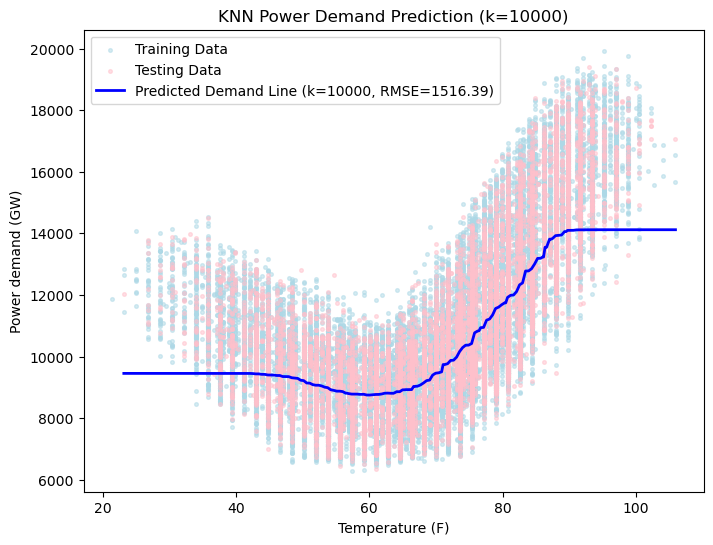

RMSE for k=2: 1672.70
RMSE for k=5: 1472.47
RMSE for k=10: 1390.03
RMSE for k=100: 1360.56
RMSE for k=500: 1369.60
RMSE for k=1000: 1380.20
RMSE for k=1500: 1386.81
RMSE for k=5000: 1414.35
RMSE for k=10000: 1516.39


In [10]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# Convert x_train and x_test to NumPy arrays and reshape
x_train_knn = x_train.values.reshape(-1, 1)
x_test_knn = x_test.values.reshape(-1, 1)

# Define the values of k to test
k_values = [2, 5, 10, 100, 500, 1000, 1500, 5000, 10000]
rmse_values = []

for k in k_values:
    # Initialize and fit the KNN model for each k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_knn, y_train)

    # Predict on the test set
    y_test_pred = knn_regressor.predict(x_test_knn)

    # Calculate RMSE for the current k
    rmse = root_mean_squared_error(y_test, y_test_pred)
    rmse_values.append(rmse)

    # Sort x_test and y_test_pred for line plotting
    sorted_indices = np.argsort(x_test_knn.flatten())
    x_test_sorted = x_test_knn.flatten()[sorted_indices]
    y_test_pred_sorted = y_test_pred[sorted_indices]

    # Plot each k in a separate figure
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train_knn, y_train, color="lightblue", s=7, alpha=0.5, label="Training Data")
    plt.scatter(x_test_knn, y_test, color="pink", s=7, alpha=0.5, label="Testing Data")
    plt.plot(x_test_sorted, y_test_pred_sorted, color="blue",lw=2, label=f"Predicted Demand Line (k={k}, RMSE={rmse:.2f})")
    plt.xlabel('Temperature (F)')
    plt.ylabel('Power demand (GW)')
    plt.title(f"KNN Power Demand Prediction (k={k})")
    plt.legend()
    plt.show()

# Display RMSE values for each k
for i, k in enumerate(k_values):
    print(f"RMSE for k={k}: {rmse_values[i]:.2f}")
